In [1]:
#Importing the important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
data = pd.read_csv('employee.csv')

# checking the shape of the dataset
data.shape

(1470, 35)

In [3]:
# lets check the head of the dataset
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

<Axes: xlabel='Age', ylabel='Count'>

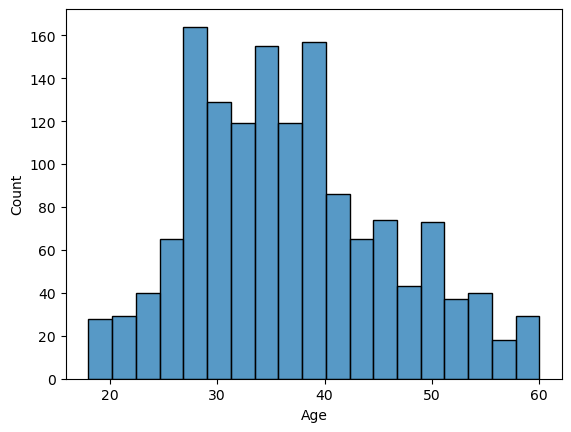

In [4]:
# Distributiong of Age variable
sns.histplot(data['Age'])

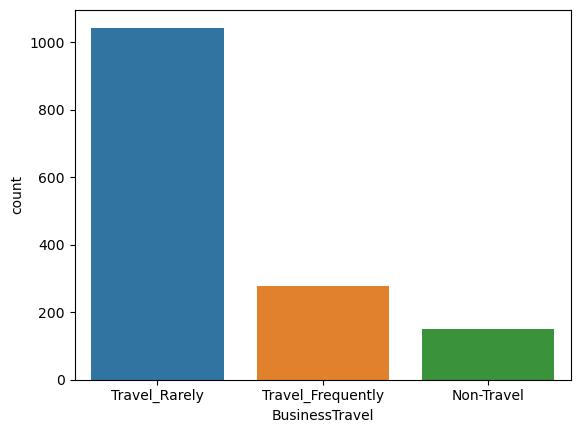

In [5]:
# Create a count plot of the 'BusinessTravel' column in the data
sns.countplot(x=data['BusinessTravel'])

# Display the plot
plt.show()

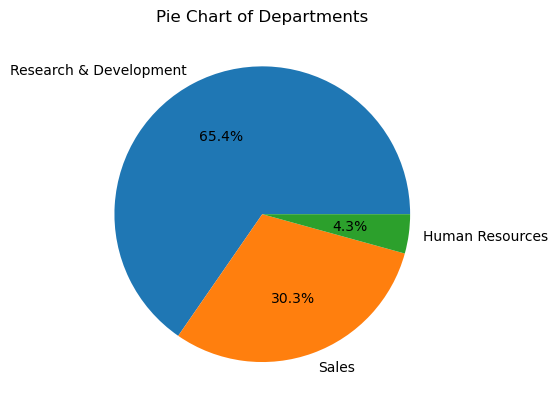

In [6]:
import matplotlib.pyplot as plt

# Get the count of employees in each department
department_counts = data['Department'].value_counts()

# Extract the department names as categories
categories = department_counts.index.tolist()

# Extract the count of employees as proportions
proportions = department_counts.values.tolist()

# Create a pie chart with the proportions and labels
plt.pie(proportions, labels=categories, autopct='%1.1f%%')

# Set the title of the chart
plt.title('Pie Chart of Departments')

# Display the chart
plt.show()

In [7]:
import seaborn as sns

# Create a bar plot to display the monthly income by department
sns.barplot(x='Department', y='MonthlyIncome', data=data)

# Set the label for the x-axis
plt.xlabel('Department')

# Set the label for the y-axis
plt.ylabel('Monthly Income')

# Set the title of the plot
plt.title('Bar Plot of Monthly Income by Department')

# Display the plot
plt.show()

In [8]:
# Create a line chart to show the monthly income by department
sns.lineplot(x='Department', y='MonthlyIncome', data=data)

# Set the label for the x-axis
plt.xlabel('Department')

# Set the label for the y-axis
plt.ylabel('Monthly Income')

# Set the title of the plot
plt.title('Line Chart of Monthly Income by Department')

# Display the plot
plt.show()

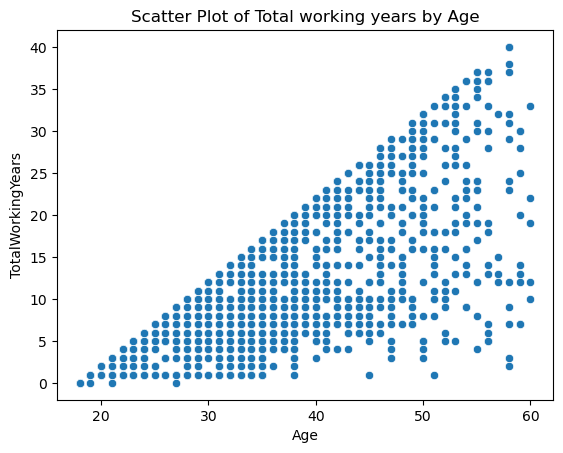

In [9]:
import seaborn as sns

# Create a scatter plot to show the MaritalStatus by age
sns.scatterplot(x = 'Age', y = 'TotalWorkingYears', data=data)

# Set the label for the x-axis
plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('TotalWorkingYears')

# Set the title of the plot
plt.title('Scatter Plot of Total working years by Age')

# Display the plot
plt.show()

<Axes: xlabel='Attrition'>

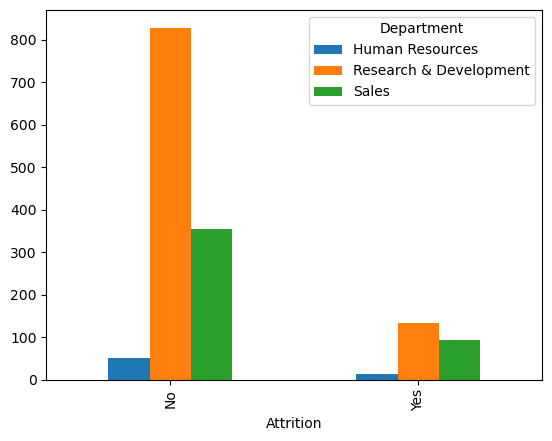

In [10]:
# let's plot two categorical variables. Department, and Attrition

# plotting a Grouped Bar Chart
pd.crosstab(data['Attrition'], data['Department']).plot(kind = 'bar', stacked = False)

<Axes: xlabel='Attrition'>

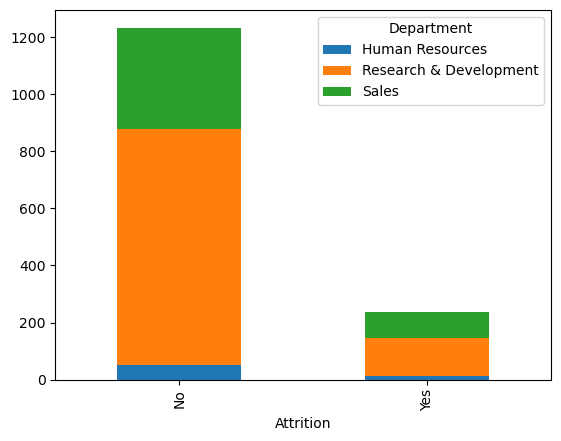

In [11]:
# plotting a Stacked Bar Chart
pd.crosstab(data['Attrition'], data['Department']).plot(kind = 'bar', stacked = True)

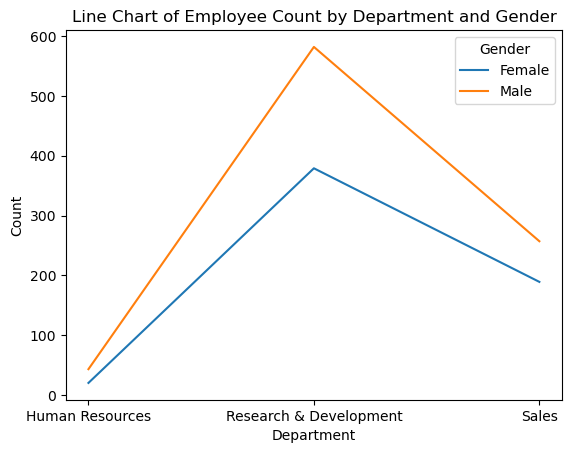

In [12]:
# Calculate the count of employees in each department based on gender
department_gender_counts = data.groupby(['Department', 'Gender']).size().reset_index(name='Count')

# Create a line chart to visualize the count of employees by department and gender
sns.lineplot(x='Department', y='Count', hue='Gender', data=department_gender_counts)

# Set the labels for the x-axis and y-axis
plt.xlabel('Department')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Line Chart of Employee Count by Department and Gender')

# Display the plot
plt.show()

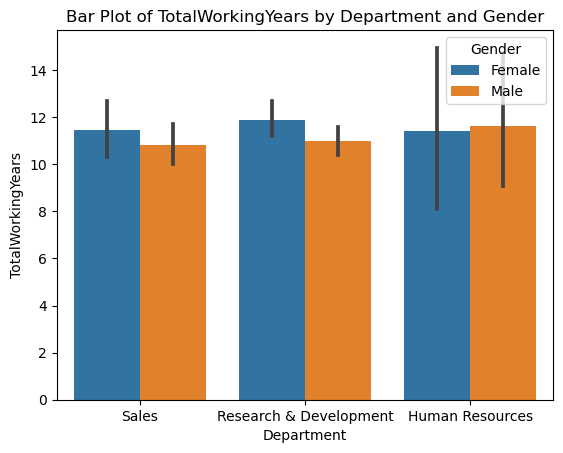

In [13]:
# Create a bar plot to show the TotalWorkingYears by department and gender
sns.barplot(x='Department', y='TotalWorkingYears', hue='Gender', data=data)

# Set the label for the x-axis
plt.xlabel('Department')

# Set the label for the y-axis
plt.ylabel('TotalWorkingYears')

# Set the title of the plot
plt.title('Bar Plot of TotalWorkingYears by Department and Gender')

# Display the plot
plt.show()

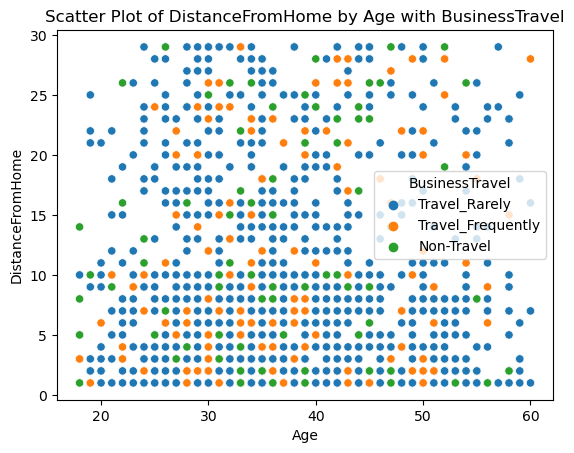

In [14]:
# Create a scatter plot to show the Distance from Home by age with BusinessTravel differentiation
sns.scatterplot(x='Age', y='DistanceFromHome', hue='BusinessTravel', data=data)

# Set the label for the x-axis
plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('DistanceFromHome')

# Set the title of the plot
plt.title('Scatter Plot of DistanceFromHome by Age with BusinessTravel')

# Display the plot
plt.show()

# Heatmaps

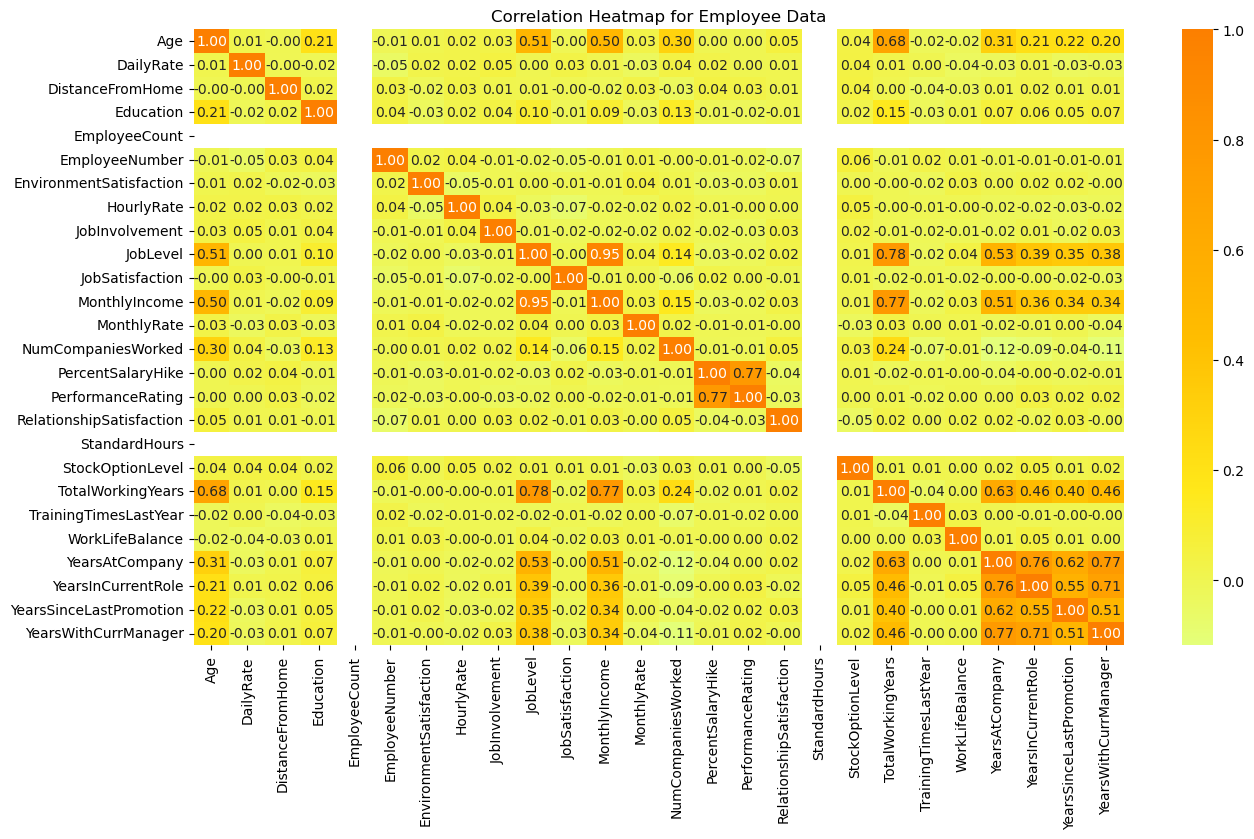

In [15]:
import numpy as np
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr(numeric_only = True)

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt="0.2f", cmap='Wistia')

plt.title('Correlation Heatmap for Employee Data')
plt.show()

# Pairplot

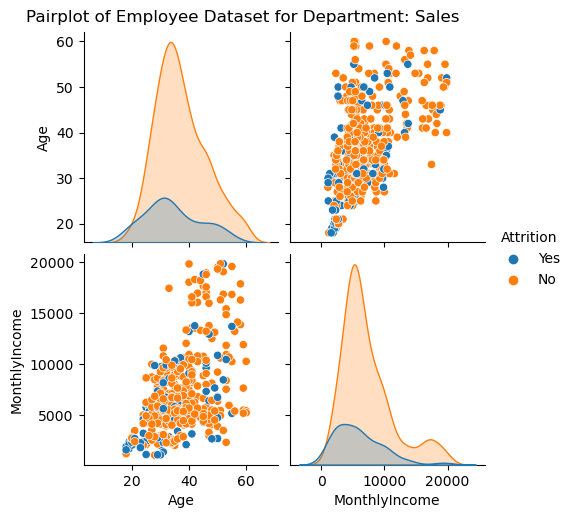

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is the DataFrame containing the employee dataset

# Specify the numerical features and target variable in the dataset
numerical_features = ['Age', 'MonthlyIncome']

# Create separate pairplots for each category in 'Department'
for category in data['Department'].unique():
    category_data = data[data['Department'] == category]
    pairplot = sns.pairplot(category_data, vars=numerical_features, hue='Attrition')
    pairplot.fig.suptitle(f"Pairplot of Employee Dataset for Department: {category}", y=1.02, x=0.05, ha='left')
    plt.show()